In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
  
  
def GetCutToRemoveAlpha(data,alpha):
  cut = int(alpha*len(data))
  return np.sort(data)[cut]

def GetCutToKeepAlpha(data,alpha):
  cut = int(alpha*len(data))
  return np.sort(data)[-cut]

def GetRejection(data,cut):
  return np.sum(data<cut) / len(data)

def GetEfficiency(data,cut):
  return np.sum(data>cut) / len(data)

def plotDLLH(all_dllh,scint_dllh,Lmin,Lmax,cut,nbins=100):
  label_all = 'All Photons (Efficiency: %2.2f)'%GetEfficiency(all_dllh,cut)
  label_scint = 'Scintillation Only (Rejection: %2.2f)'%GetRejection(scint_dllh,cut)
  nall,_,_ = plt.hist(all_dllh,bins=np.linspace(Lmin,Lmax,nbins),alpha=0.5,label=label_all,color='green')
  nscint,_,_ = plt.hist(scint_dllh,bins=np.linspace(Lmin,Lmax,nbins),alpha=0.5,label=label_scint,color='blue')
  plt.xlabel(r'$\log \mathcal{L}_{\rm all} - \log \mathcal{L}_{\rm scint}$')
  plt.ylabel('Counts')
  plt.semilogy()
  return max(np.max(nall),np.max(nscint))

def plotROCcurve(all_dllh,scint_dllh,label,N=10000):
  cut_min = min(np.min(all_dllh),np.min(scint_dllh))
  cut_max = max(np.max(all_dllh),np.max(scint_dllh))
  cut_range = np.linspace(cut_min,cut_max,N)
  AllEfficiency = []
  ScintRejection = []
  for cut in cut_range:
    AllEfficiency.append(GetEfficiency(all_dllh,cut))
    ScintRejection.append(GetRejection(scint_dllh,cut))
  plt.plot(ScintRejection,AllEfficiency,label=label)

  

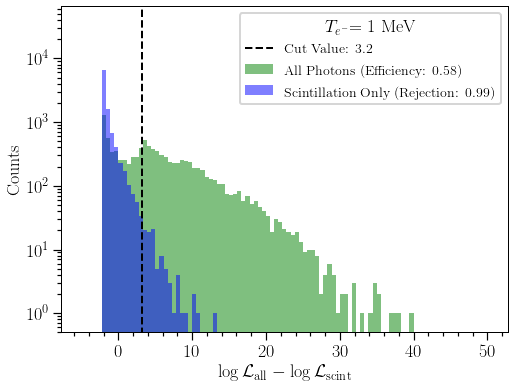

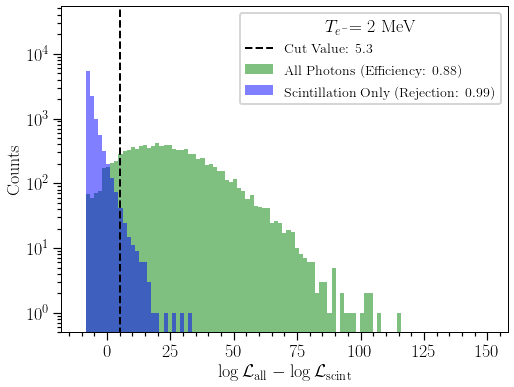

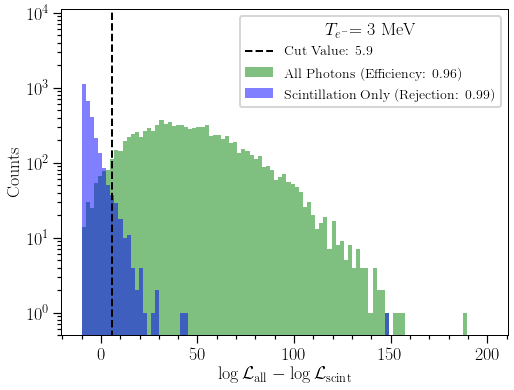

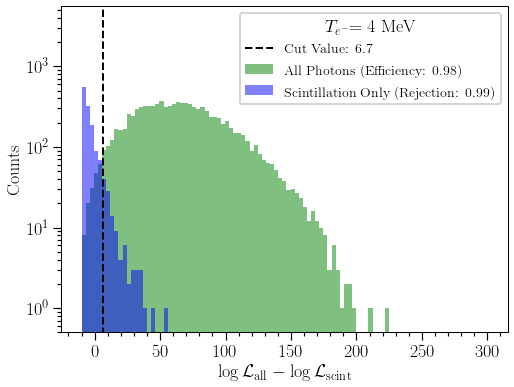

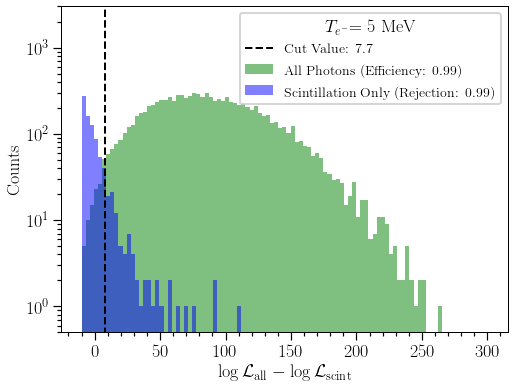

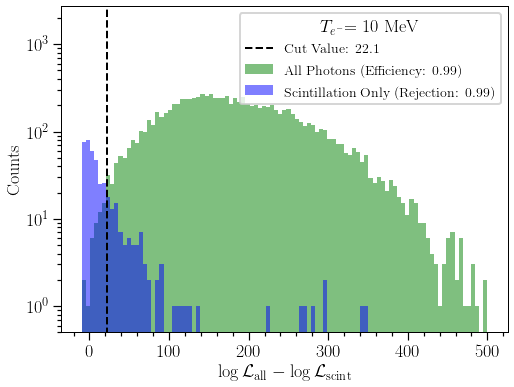

In [2]:
Lminrange=[-5,-10,-10,-10,-10,-10]
Lmaxrange=[50,150,200,300,300,500]
Erange=[1,2,3,4,5,10]
for E,Lmin,Lmax in zip(Erange,Lminrange,Lmaxrange):
  all_dllh = np.load('DeltaLLH_Data/10000_event_runs/all_dLLH_E%s.npy'%str(E))
  scint_dllh = np.load('DeltaLLH_Data/10000_event_runs/scint_dLLH_E%s.npy'%str(E))
  cut = GetCutToRemoveAlpha(scint_dllh,0.99)
  nmax = plotDLLH(all_dllh,scint_dllh,Lmin,Lmax,cut)
  plt.plot([cut,cut],[0,10*nmax],color='black',ls='--',label='Cut Value: %2.1f'%cut)
  plt.legend(title=(r'$T_{e^-}$' + '= %s MeV'%str(E)))
  plt.ylim(5e-1,10*nmax)
  plt.savefig('Figures/LLH_figures/DLLH_Plot_E%s.png'%str(E))
  plt.show()


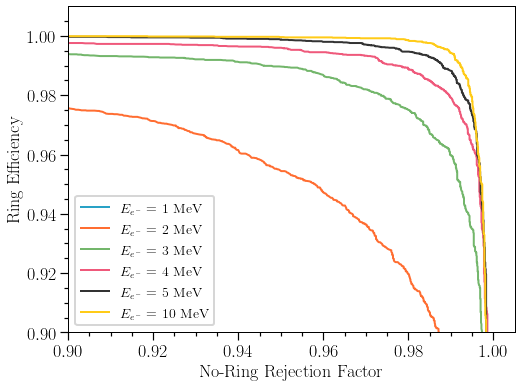

In [4]:
for E in Erange:
  all_dllh = np.load('DeltaLLH_Data/10000_event_runs/all_dLLH_E%s.npy'%str(E))
  scint_dllh = np.load('DeltaLLH_Data/10000_event_runs/scint_dLLH_E%s.npy'%str(E))
  plotROCcurve(all_dllh,scint_dllh,label=r'$E_{e^-}$ = %d MeV'%E)
plt.legend()
#plt.loglog()
plt.xlim(0.9,1.005)
plt.ylim(0.9,1.01)
plt.xlabel('No-Ring Rejection Factor')
plt.ylabel('Ring Efficiency')
plt.savefig('Figures/LLH_figures/ROC_curve.png')
plt.show()